In [1]:
#Импорт библиотек

In [5]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from pathlib import Path
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [6]:
#Классы обработки данных

In [7]:
class Selector(BaseEstimator, TransformerMixin):  
          
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):       
        return self

    def transform(self, X, y=None):
        
        return X[self.features]

In [8]:
class To_list(BaseEstimator, TransformerMixin):  
              
    def fit(self, X, y=None):       
        return self

    def transform(self, X, y=None):
        X_new = []
        X = X.values
        X = X.tolist()
        for sublist in X:
            for item in sublist:
                X_new.append(item)
        return X_new

In [9]:
#Чтение и обработка данных

In [10]:
PATH_TRAIN = Path("C:\snli_1.0_train.csv")
PATH_DEV = Path("C:\snli_1.0_dev.csv")
PATH_TEST = Path("C:\snli_1.0_test.csv")


df_train = pd.read_csv(PATH_TRAIN)
df_dev = pd.read_csv(PATH_DEV)
df_test = pd.read_csv(PATH_TEST)

In [11]:
df_train

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550147,contradiction,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( four kids ) ( ( won awards ) ( ( ( for ` )...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (NP (CD four) (NNS kids)) (VP (VBD wo...,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',2267923837.jpg#3,2267923837.jpg#3r1c,contradiction,NaN,NaN,NaN,NaN
550148,neutral,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( ( ( ( ( four ( homeless children ) ) ( had...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (S (NP (CD four) (JJ homeless) (NNS c...,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",2267923837.jpg#3,2267923837.jpg#3r1n,neutral,NaN,NaN,NaN,NaN
550149,neutral,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a bodysuit ) ) ) ( ( is (...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,7979219683.jpg#2,7979219683.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
550150,contradiction,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a ( business suit ) ) ) )...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,7979219683.jpg#2,7979219683.jpg#2r1c,contradiction,NaN,NaN,NaN,NaN


In [12]:
df_dev

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( Two women ) ( ( are ( embracing ( while ( ...,( ( The sisters ) ( ( are ( ( hugging goodbye ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (DT The) (NNS sisters)) (VP (VBP ...,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,4705552913.jpg#2,4705552913.jpg#2r1n,neutral,entailment,neutral,neutral,neutral
1,entailment,( ( Two women ) ( ( are ( embracing ( while ( ...,( ( Two woman ) ( ( are ( holding packages ) )...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (CD Two) (NN woman)) (VP (VBP are...,Two women are embracing while holding to go pa...,Two woman are holding packages.,4705552913.jpg#2,4705552913.jpg#2r1e,entailment,entailment,entailment,entailment,entailment
2,contradiction,( ( Two women ) ( ( are ( embracing ( while ( ...,( ( The men ) ( ( are ( fighting ( outside ( a...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (DT The) (NNS men)) (VP (VBP are)...,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,4705552913.jpg#2,4705552913.jpg#2r1c,contradiction,contradiction,contradiction,contradiction,contradiction
3,entailment,( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,( ( ( Two kids ) ( in ( numbered jerseys ) ) )...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,2407214681.jpg#0,2407214681.jpg#0r1e,entailment,entailment,entailment,entailment,entailment
4,neutral,( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,( ( ( Two kids ) ( at ( a ballgame ) ) ) ( ( w...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,2407214681.jpg#0,2407214681.jpg#0r1n,neutral,neutral,neutral,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-,( ( ( A ( small girl ) ) ( wearing ( a ( pink ...,( ( The girl ) ( ( is ( sitting ( on ( ( a ( c...,(ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...,(ROOT (S (NP (DT The) (NN girl)) (VP (VBZ is) ...,A small girl wearing a pink jacket is riding o...,The girl is sitting on a carved horse made of ...,77063034.jpg#3,77063034.jpg#3r1n,neutral,contradiction,entailment,contradiction,NaN
9996,contradiction,( ( ( A ( small girl ) ) ( wearing ( a ( pink ...,( ( The girl ) ( ( is ( moving ( at ( ( the sp...,(ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...,(ROOT (S (NP (DT The) (NN girl)) (VP (VBZ is) ...,A small girl wearing a pink jacket is riding o...,The girl is moving at the speed of light.,77063034.jpg#3,77063034.jpg#3r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9997,entailment,( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...,( People ( in ( a ( water fountain ) ) ) ),(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...,(ROOT (NP (NP (NNS People)) (PP (IN in) (NP (D...,A young girl with blue and pink ribbons in her...,People in a water fountain,4805835848.jpg#0,4805835848.jpg#0r1e,entailment,entailment,entailment,entailment,entailment
9998,contradiction,( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...,( ( ( A ( young girl ) ) knits ) ( a sweater ) ),(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...,(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (NP...,A young girl with blue and pink ribbons in her...,A young girl knits a sweater,4805835848.jpg#0,4805835848.jpg#0r1c,contradiction,contradiction,entailment,contradiction,neutral


In [13]:
df_test

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( has ( cracks ( in ( the c...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ ha...,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,2677109430.jpg#1,2677109430.jpg#1r1n,neutral,contradiction,contradiction,neutral,neutral
1,entailment,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( is ( filled ( with song )...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ is...,This church choir sings to the masses as they ...,The church is filled with song.,2677109430.jpg#1,2677109430.jpg#1r1e,entailment,entailment,entailment,neutral,entailment
2,contradiction,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( ( A choir ) ( singing ( at ( a ( baseball ...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (NP (NP (DT A) (NN choir)) (VP (VBG sing...,This church choir sings to the masses as they ...,A choir singing at a baseball game.,2677109430.jpg#1,2677109430.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
3,neutral,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is young ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is young.,6160193920.jpg#4,6160193920.jpg#4r1n,neutral,neutral,neutral,neutral,neutral
4,entailment,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is ( very happy ) ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,6160193920.jpg#4,6160193920.jpg#4r1e,entailment,entailment,contradiction,entailment,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,contradiction,( ( Two women ) ( ( are ( ( observing somethin...,( ( ( Two women ) ( are ( standing ( with ( th...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (NP (CD Two) (NNS women)) (SBAR (...,Two women are observing something together.,Two women are standing with their eyes closed.,4378810163.jpg#4,4378810163.jpg#4r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9996,entailment,( ( Two women ) ( ( are ( ( observing somethin...,( ( Two girls ) ( ( are ( looking ( at somethi...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (CD Two) (NNS girls)) (VP (VBP ar...,Two women are observing something together.,Two girls are looking at something.,4378810163.jpg#4,4378810163.jpg#4r1e,entailment,entailment,entailment,contradiction,entailment
9997,contradiction,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( flying ( a kite ) ) ) . ) ),(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is flying a kite.,152881593.jpg#1,152881593.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9998,entailment,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( speaking ( in ( a classro...,(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is speaking in a classroom.,152881593.jpg#1,152881593.jpg#1r1e,entailment,entailment,entailment,neutral,entailment


In [14]:
df_train = df_train.drop('sentence1_binary_parse', axis = 1) 
df_train = df_train.drop('sentence2_binary_parse', axis = 1) 
df_train = df_train.drop('sentence1_parse', axis = 1) 
df_train = df_train.drop('sentence2_parse', axis = 1) 
df_train = df_train.drop('captionID', axis = 1) 


df_train = df_train.drop('pairID', axis = 1) 
df_train = df_train.drop('label1', axis = 1) 
df_train = df_train.drop('label2', axis = 1) 
df_train = df_train.drop('label3', axis = 1) 
df_train = df_train.drop('label4', axis = 1) 
df_train = df_train.drop('label5', axis = 1) 


df_train = df_train[df_train['gold_label'] != '-']
df_train = df_train.dropna()


df_train_labels = df_train['gold_label'] 
df_train_labels = pd.DataFrame(df_train_labels, columns=['gold_label'])
df_train = df_train.drop('gold_label', axis = 1) 


df_train

,sentence1,sentence2
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,Children smiling and waving at camera,They are smiling at their parents
4,Children smiling and waving at camera,There are children present
...,...,...
550147,Four dirty and barefooted children.,four kids won awards for 'cleanest feet'
550148,Four dirty and barefooted children.,"four homeless children had their shoes stolen,..."
550149,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...
550150,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...


In [15]:
df_train_labels['gold_label'].value_counts()

entailment       183414
contradiction    183185
neutral          182762
Name: gold_label, dtype: int64

(-1.1006801236820236,
 1.1000323868420012,
 -1.1005823978750187,
 1.1004883806465768)

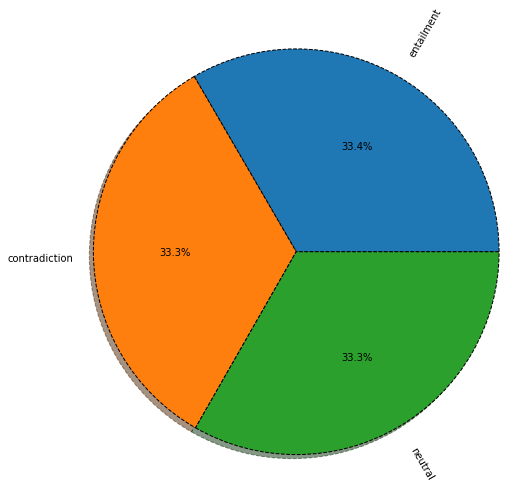

In [16]:
vals = df_train_labels['gold_label'].value_counts()
labels = ['entailment', 'contradiction', 'neutral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [17]:
df_dev = df_dev.drop('sentence1_binary_parse', axis = 1) 
df_dev = df_dev.drop('sentence2_binary_parse', axis = 1) 
df_dev = df_dev.drop('sentence1_parse', axis = 1) 
df_dev = df_dev.drop('sentence2_parse', axis = 1) 
df_dev = df_dev.drop('captionID', axis = 1) 
df_dev = df_dev.drop('pairID', axis = 1) 
df_dev = df_dev.drop('label1', axis = 1) 
df_dev = df_dev.drop('label2', axis = 1) 
df_dev = df_dev.drop('label3', axis = 1) 
df_dev = df_dev.drop('label4', axis = 1) 
df_dev = df_dev.drop('label5', axis = 1) 

df_dev = df_dev[df_dev['gold_label'] != '-']
df_dev = df_dev.dropna()

df_dev_labels = df_dev['gold_label'] 
df_dev_labels = pd.DataFrame(df_dev_labels, columns=['gold_label'])
df_dev = df_dev.drop('gold_label', axis = 1) 

df_dev

,sentence1,sentence2
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...
1,Two women are embracing while holding to go pa...,Two woman are holding packages.
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.
...,...,...
9994,A small girl wearing a pink jacket is riding o...,The carousel is moving.
9996,A small girl wearing a pink jacket is riding o...,The girl is moving at the speed of light.
9997,A young girl with blue and pink ribbons in her...,People in a water fountain
9998,A young girl with blue and pink ribbons in her...,A young girl knits a sweater


In [18]:
df_dev_labels['gold_label'].value_counts()

entailment       3329
contradiction    3278
neutral          3235
Name: gold_label, dtype: int64

(-1.1050519235936576,
 1.100240567790174,
 -1.103914484192887,
 1.1042243415775972)

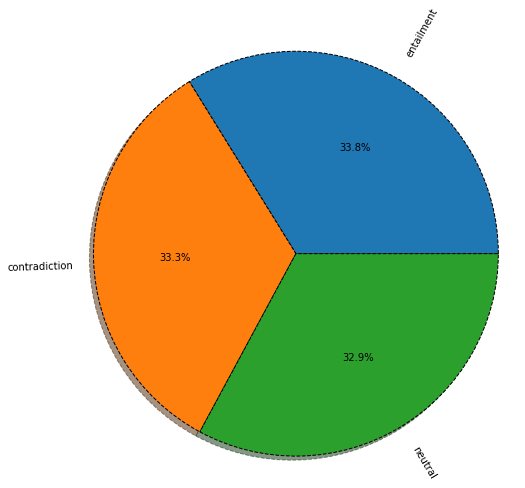

In [19]:
vals = df_dev_labels['gold_label'].value_counts()
labels = ['entailment', 'contradiction', 'neutral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [20]:
df_test = df_test.drop('sentence1_binary_parse', axis = 1) 
df_test = df_test.drop('sentence2_binary_parse', axis = 1) 
df_test = df_test.drop('sentence1_parse', axis = 1) 
df_test = df_test.drop('sentence2_parse', axis = 1) 
df_test = df_test.drop('captionID', axis = 1) 

df_test_pair_id = df_test['pairID']
df_test_pair_id = pd.DataFrame(df_test_pair_id, columns=['pairID'])


df_test = df_test.drop('pairID', axis = 1) 

df_test = df_test.drop('label1', axis = 1) 
df_test = df_test.drop('label2', axis = 1) 
df_test = df_test.drop('label3', axis = 1) 
df_test = df_test.drop('label4', axis = 1) 
df_test = df_test.drop('label5', axis = 1) 
df_test_labels = df_test['gold_label']
df_test_labels = pd.DataFrame(df_test_labels, columns=['gold_label'])
df_test = df_test.drop('gold_label', axis = 1) 

df_test

,sentence1,sentence2
0,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,This church choir sings to the masses as they ...,The church is filled with song.
2,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,"A woman with a green headscarf, blue shirt and...",The woman is very happy.
...,...,...
9995,Two women are observing something together.,Two women are standing with their eyes closed.
9996,Two women are observing something together.,Two girls are looking at something.
9997,A man in a black leather jacket and a book in ...,A man is flying a kite.
9998,A man in a black leather jacket and a book in ...,A man is speaking in a classroom.


In [21]:
df_test_labels

,gold_label
0,neutral
1,entailment
2,contradiction
3,neutral
4,entailment
...,...
9995,contradiction
9996,entailment
9997,contradiction
9998,entailment


In [22]:
#Выбор столбцов для конвееров

In [23]:
For_Selector1 = ['sentence1']

In [24]:
For_Selector2 = ['sentence2']

In [25]:
#Базовая модель

In [26]:
pipe1 = Pipeline([('Selector', Selector(For_Selector1)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer())])

In [27]:
pipe2 = Pipeline([('Selector', Selector(For_Selector2)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer())])

In [28]:
full_pipeline = FeatureUnion(transformer_list=[
    ('pipe1', pipe1),
    ('pipe2', pipe2),
])

In [29]:
full_pipeline.fit(df_train)

FeatureUnion(transformer_list=[('pipe1',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence1'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer())])),
                               ('pipe2',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence2'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer())]))])

In [30]:
df_train_transform = full_pipeline.transform(df_train)

In [31]:
df_dev_transform = full_pipeline.transform(df_dev)

In [32]:
df_test_transform = full_pipeline.transform(df_test)

In [33]:
df_train_transform

<549361x48002 sparse matrix of type '<class 'numpy.float64'>'
	with 9328160 stored elements in Compressed Sparse Row format>

In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(df_train_transform, df_train_labels)

LogisticRegression()

In [36]:
logreg.score(df_train_transform, df_train_labels)

0.6597974737922787

In [37]:
print("Спрогнозированные вероятности для обучающего набора:\n{}".format(logreg.predict_proba(df_train_transform)))

Спрогнозированные вероятности для обучающего набора:
[[0.00269031 0.01616458 0.98114511]
 [0.32177092 0.20540394 0.47282513]
 [0.00486251 0.94899597 0.04614152]
 ...
 [0.06651992 0.14416632 0.78931376]
 [0.19351028 0.04734916 0.75914056]
 [0.25789205 0.33881921 0.40328873]]


In [38]:
logreg.score(df_dev_transform, df_dev_labels)

0.652306441780126

In [39]:
print("Спрогнозированные вероятности для валидационного набора:\n{}".format(logreg.predict_proba(df_dev_transform)))

Спрогнозированные вероятности для валидационного набора:
[[0.07790739 0.00179784 0.92029477]
 [0.24997488 0.57064387 0.17938126]
 [0.55933811 0.30909909 0.1315628 ]
 ...
 [0.03147965 0.86223859 0.10628176]
 [0.53326695 0.28747425 0.17925879]
 [0.04798288 0.10149117 0.85052595]]


In [40]:
#Лучшая модель

In [41]:
pipe3 = Pipeline([('Selector', Selector(For_Selector1)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(min_df=10, stop_words=None, ngram_range=(1,3)))])

In [42]:
pipe4 = Pipeline([('Selector', Selector(For_Selector2)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(min_df=10, stop_words=None, ngram_range=(1,3)))])

In [43]:
full_pipeline2 = FeatureUnion(transformer_list=[
    ('pipe3', pipe3),
    ('pipe4', pipe4),
])

In [44]:
full_pipeline2.fit(df_train)

FeatureUnion(transformer_list=[('pipe3',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence1'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=10,
                                                                 ngram_range=(1,
                                                                              3)))])),
                               ('pipe4',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence2'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=10,
                            

In [45]:
df_train_transform = full_pipeline2.transform(df_train)

In [46]:
df_dev_transform = full_pipeline2.transform(df_dev)

In [47]:
df_test_transform = full_pipeline2.transform(df_test)

In [48]:
logreg2 = LogisticRegression(C=10)

In [49]:
logreg2.fit(df_train_transform, df_train_labels)

LogisticRegression(C=10)

In [50]:
logreg2.score(df_train_transform, df_train_labels)

0.7026818430867863

In [51]:
print("Спрогнозированные вероятности для обучающего набора:\n{}".format(logreg2.predict_proba(df_train_transform)))

Спрогнозированные вероятности для обучающего набора:
[[0.00796646 0.01277669 0.97925685]
 [0.57180265 0.17563517 0.25256218]
 [0.00571719 0.98005379 0.01422902]
 ...
 [0.00617557 0.01314253 0.9806819 ]
 [0.51173176 0.03785352 0.45041472]
 [0.21503523 0.40580828 0.37915649]]


In [52]:
logreg2.score(df_dev_transform, df_dev_labels)

0.6697825645194067

In [53]:
print("Спрогнозированные вероятности для валидационного набора:\n{}".format(logreg2.predict_proba(df_dev_transform)))

Спрогнозированные вероятности для валидационного набора:
[[2.24456434e-02 1.09025662e-04 9.77445331e-01]
 [1.41329358e-01 7.50471164e-01 1.08199478e-01]
 [5.31221531e-01 3.60991402e-01 1.07787066e-01]
 ...
 [2.56264688e-02 9.05184289e-01 6.91892425e-02]
 [8.28023201e-01 1.15480268e-01 5.64965308e-02]
 [3.85520079e-02 4.69015406e-02 9.14546452e-01]]


In [54]:
#Получение прогнозов на тестовом наборе

In [55]:
df_test_res = logreg2.predict(df_test_transform)
df_test_res

array(['contradiction', 'neutral', 'contradiction', ..., 'contradiction',
       'entailment', 'neutral'], dtype=object)

In [56]:
print("Спрогнозированные вероятности для тестового набора:\n{}".format(logreg2.predict_proba(df_test_transform)))

Спрогнозированные вероятности для тестового набора:
[[0.42635814 0.20650052 0.36714134]
 [0.20769417 0.16379461 0.62851121]
 [0.3732169  0.30718474 0.31959836]
 ...
 [0.79932735 0.15694366 0.04372899]
 [0.06166429 0.74993242 0.18840329]
 [0.20026056 0.12094005 0.67879939]]


In [57]:
#Подготовка и загрузка данных в файл

In [59]:
df_test_res = pd.DataFrame(df_test_res, columns=['predicted_label'])
df_test_res

,predicted_label
0,contradiction
1,neutral
2,contradiction
3,contradiction
4,neutral
...,...
9995,contradiction
9996,entailment
9997,contradiction
9998,entailment


In [60]:
df_test_res['pairID'] = df_test_pair_id 
df_test_res

,predicted_label,pairID
0,contradiction,2677109430.jpg#1r1n
1,neutral,2677109430.jpg#1r1e
2,contradiction,2677109430.jpg#1r1c
3,contradiction,6160193920.jpg#4r1n
4,neutral,6160193920.jpg#4r1e
...,...,...
9995,contradiction,4378810163.jpg#4r1c
9996,entailment,4378810163.jpg#4r1e
9997,contradiction,152881593.jpg#1r1c
9998,entailment,152881593.jpg#1r1e


In [62]:
dfa = df_test_res['pairID']
dfb = df_test_res['predicted_label']

In [67]:
dfres = pd.DataFrame(dfa, columns=['pairID'])
dfres

,pairID
0,2677109430.jpg#1r1n
1,2677109430.jpg#1r1e
2,2677109430.jpg#1r1c
3,6160193920.jpg#4r1n
4,6160193920.jpg#4r1e
...,...
9995,4378810163.jpg#4r1c
9996,4378810163.jpg#4r1e
9997,152881593.jpg#1r1c
9998,152881593.jpg#1r1e


In [68]:
dfres['predicted_label'] = dfb
dfres

,pairID,predicted_label
0,2677109430.jpg#1r1n,contradiction
1,2677109430.jpg#1r1e,neutral
2,2677109430.jpg#1r1c,contradiction
3,6160193920.jpg#4r1n,contradiction
4,6160193920.jpg#4r1e,neutral
...,...,...
9995,4378810163.jpg#4r1c,contradiction
9996,4378810163.jpg#4r1e,entailment
9997,152881593.jpg#1r1c,contradiction
9998,152881593.jpg#1r1e,entailment


In [69]:
dfres.to_csv("D:/results.csv", header=True, index=False)